<a href="https://colab.research.google.com/github/ROSILENE05/Analise_dados_Python-Arquitetura_EmpresaTI/blob/main/Desafio_tecnico_SENAI_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pipelines são fluxos de trabalho automatizados que movem e transformam dados ou processos, e é o ponto de partida.



1-Defina o Objetivo;

2-Escolha a Ferramenta ou Plataforma;

3-Planeje os Estágios (Tasks ou Steps);

4-Projete o Fluxo de Dados ou de Controle;

5-Implemente o Primeiro Estágio (MVP - Minimum Viable Pipeline);

6-Teste e Monitore;

7-Itere e Melhore;






# Pipeline de Exploração e Modelagem

###1-Ingestão e Coleta de Dados:   

Fontes de Dados

Extração


###2-Armazenamento e Gerenciamento de Dados:

Local de Armazenamento

Organização

Versionamento (Opcional, mas recomendado)

###3-Exploração e Análise Exploratória de Dados (EDA):

Entendimento dos Dados

Visualizações

Resumos Estatísticos



###4-Pré-processamento e Limpeza de Dados:

Tratamento de Valores Ausentes

Detecção e Tratamento de Outliers

Transformação de Dados

Seleção de Features (Opcional)


###5-Engenharia de Features (Opcional, mas poderoso):

Criação de Novas Features

Extração de Features


###6-Seleção e Treinamento de Modelos:

Escolha do Modelo

Divisão dos Dados

Treinamento

Ajuste de Hiperparâmetros


###7-Avaliação de Modelos:

Métricas de Avaliação

Validação Cruzada

Comparação de Modelos


###8-Implantação (Deployment):

Preparação para Implantação

Escolha da Plataforma

Implementação


###9-Monitoramento e Manutenção:

Monitoramento do Desempenho

Detecção de Desvios (Drift)

Retreinamento

Atualizações





In [39]:

# Importando asa bibliotecas
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [40]:
# 1. 1-Ingestão e Coleta de Dados:
# Carregamento dos Dados
try:
    df = pd.read_csv('/dados.csv')
    print("Dados carregados com sucesso!")
    print(df.head())
except FileNotFoundError:
    print("Erro: O arquivo 'dados.csv' não foi encontrado.")
    exit()

Dados carregados com sucesso!
       A     B     C     D    E     F     G     H     I     J     L     M  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      N  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  


In [75]:
# prompt: descreva o data frame

# Display the first few rows of the DataFrame
#print(df.head())


# Check for missing values in each column
#print(df.isnull().sum())

# Display the shape (rows, columns) of the DataFrame
print(df.shape)

# Display the data types of each column
#df.dtypes

# Show the unique values in specific columns (example)
# Replace 'column_name' with the actual column name you want to inspect.
#print(df['C'].unique())

# You can add more detailed analysis based on your specific needs.
# For example, you could check for correlations between variables using df.corr()
# or visualize data distributions using histograms or boxplots.


(178, 13)


In [79]:
# 2. Armazenamento e Gerenciamento de Dados:
# Análise Exploratória Inicial
#print("\nInformações gerais sobre o DataFrame:")
#df.info()

#print("\nEstatísticas descritivas:")
#print(df.describe())

print(df.tail)


#print(df.head())

# Check for missing values in each column
#print(df.isnull().sum())

# Display the shape (rows, columns) of the DataFrame
#print(df.shape)

# Display the data types of each column
#df.dtypes

# Show the unique values in specific columns (example)
# Replace 'column_name' with the actual column name you want to inspect.
#print(df['C'].unique())


# Identificar tipos de colunas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"\nColunas numéricas: {numeric_cols}")
print(f"Colunas categóricas: {categorical_cols}")

<bound method NDFrame.tail of          A     B     C     D    E     F     G     H     I      J     L     M  \
0    14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
1    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
2    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
3    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
4    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
173  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
174  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
175  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
176  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
177  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

        N


Visualizações dos dados:


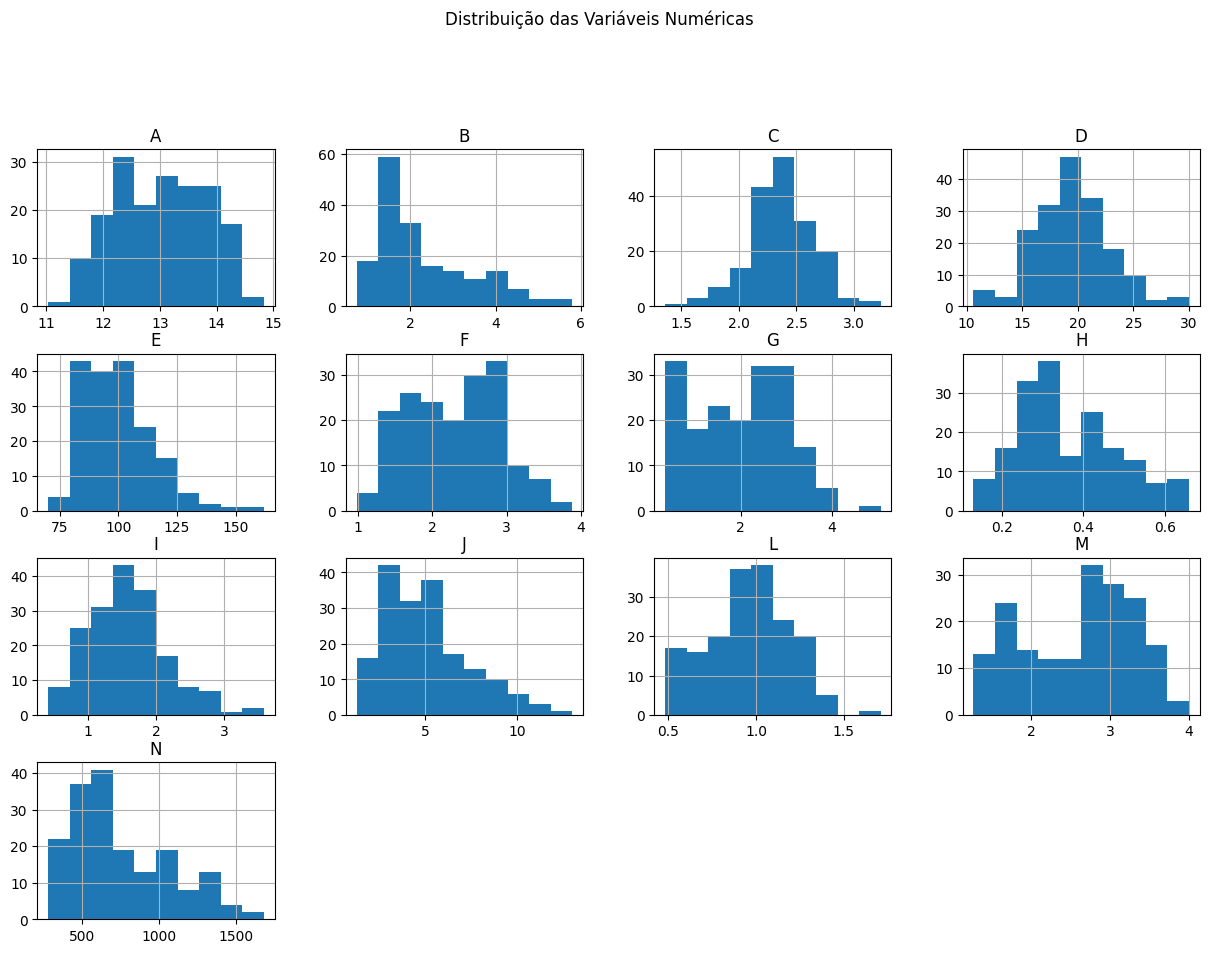

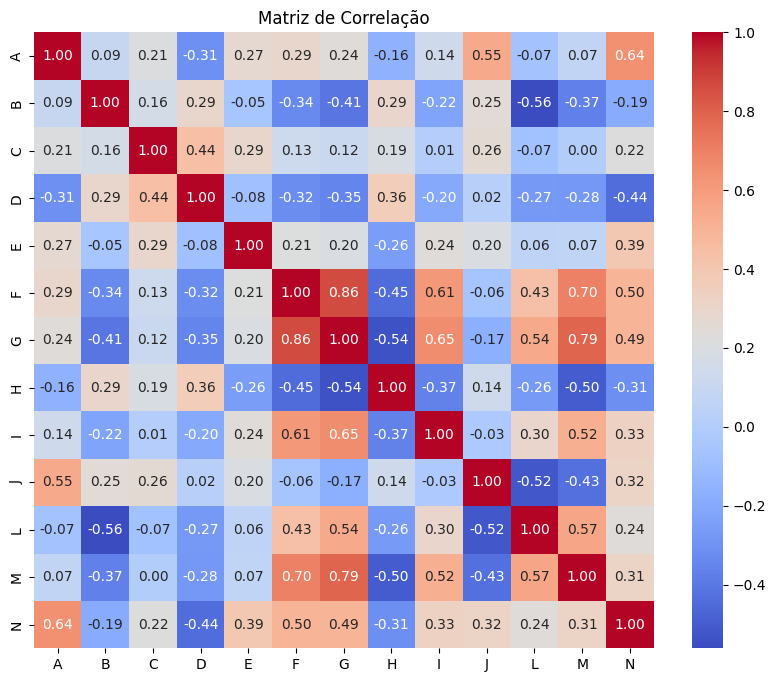

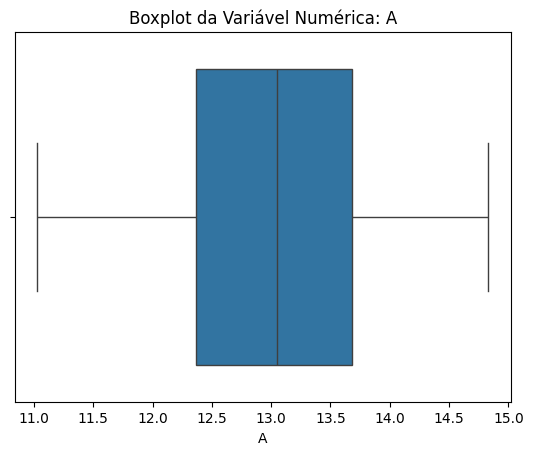

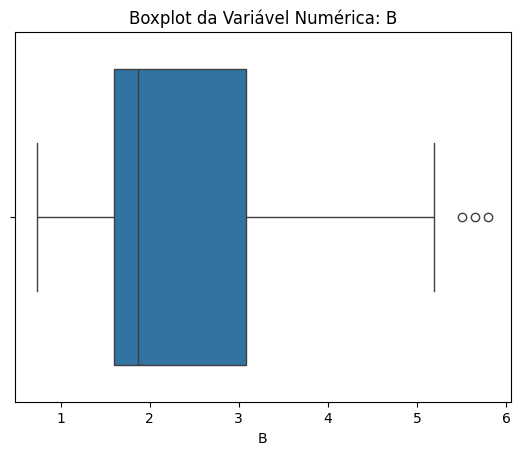

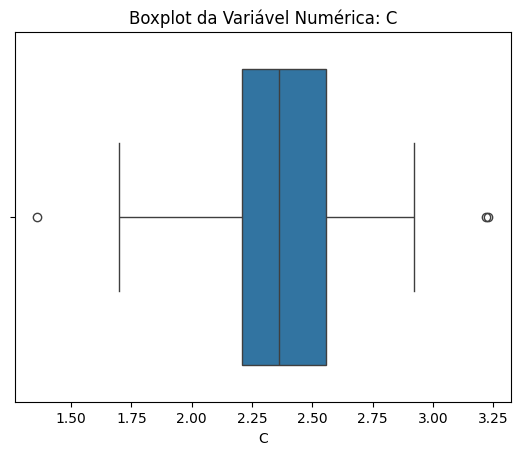

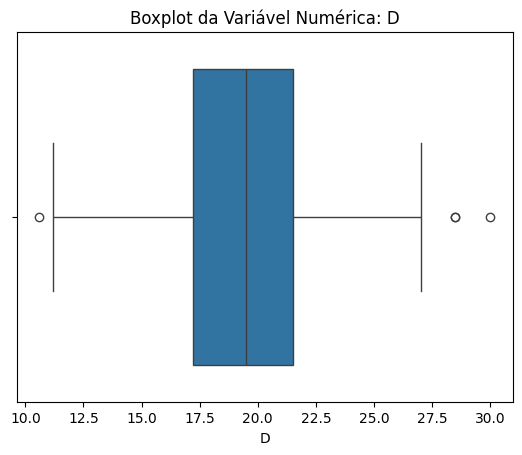

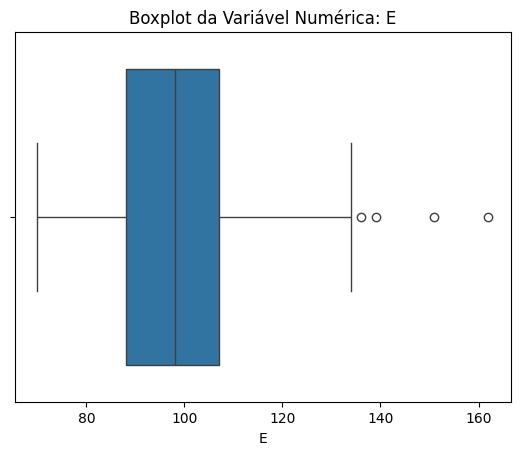

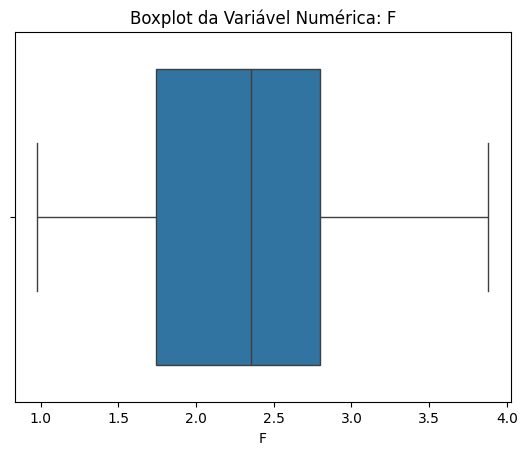

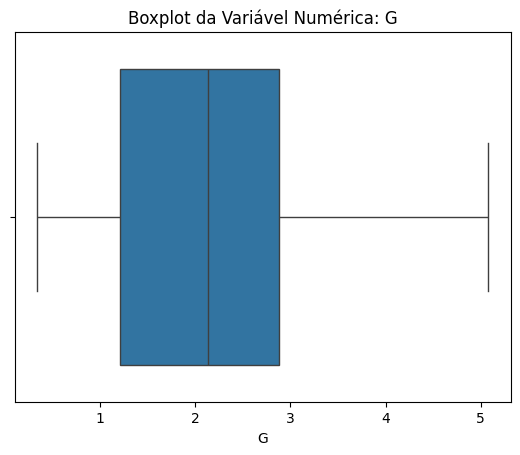

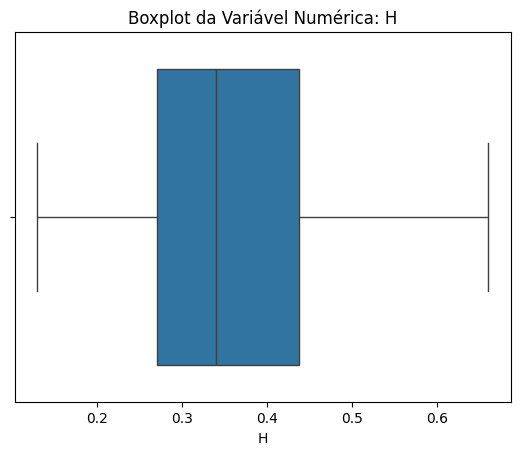

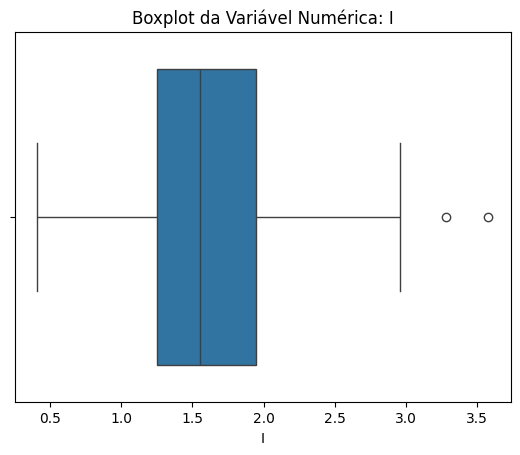

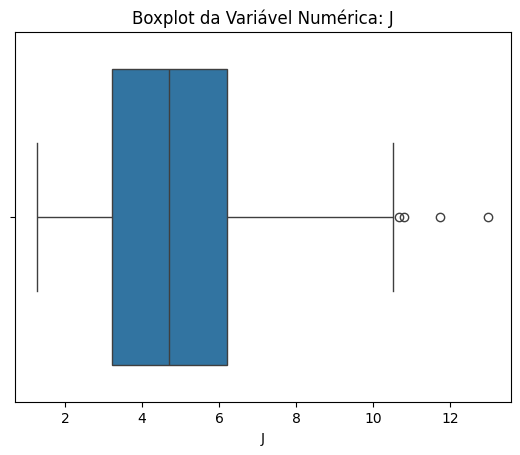

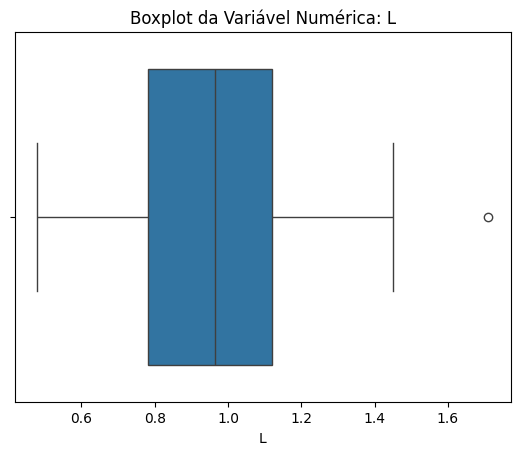

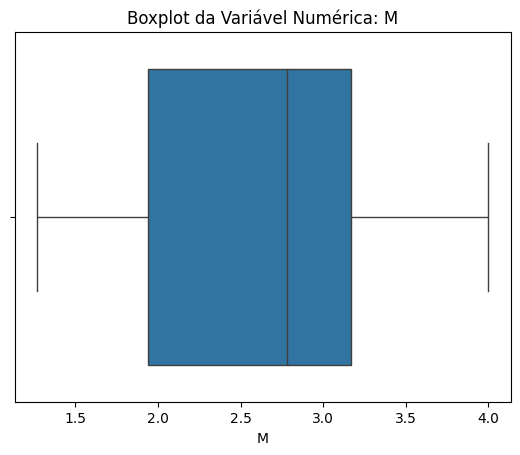

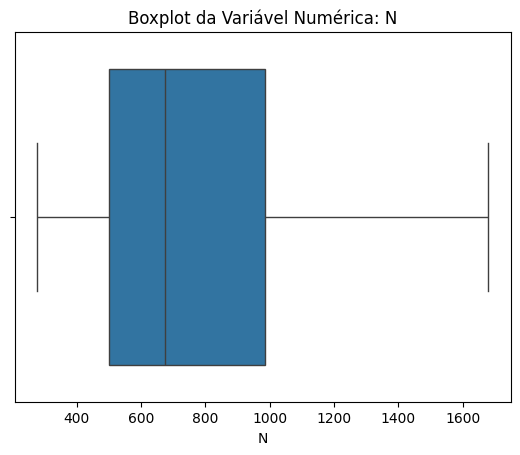

In [42]:
# 3. Exploração e Análise Exploratória de Dados (EDA):
# Visualização dos Dados
print("\nVisualizações dos dados:")

# Distribuição das variáveis numéricas
df[numeric_cols].hist(figsize=(15, 10))
plt.suptitle("Distribuição das Variáveis Numéricas", y=1.02)
plt.show()

# Contagem das variáveis categóricas
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Contagem da Variável Categórica: {col}")
    plt.show()

# Correlação entre variáveis numéricas
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Boxplots para identificar outliers (variáveis numéricas)
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot da Variável Numérica: {col}")
    plt.show()


In [43]:
# 4. Pré-processamento e Limpeza de Dados:
# Preparação dos dados

# Primeiras linhas do DataFrame
print(df.head())

# Informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
print(df.info())

# Estatísticas descritivas das colunas numéricas
print(df.describe())

# Verificar valores ausentes por coluna
print(df.isnull().sum())

# Verificar valores duplicados
print(df.duplicated().sum())

# Get the actual numeric and categorical column names from your DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remover linhas com valores ausentes
df_sem_nulos = df.dropna()

# Preencher valores ausentes com a média da coluna (para colunas numéricas)
# Use the first numeric column if it exists
if numeric_cols:
    df[numeric_cols[0]].fillna(df[numeric_cols[0]].mean(), inplace=True)

# Preencher valores ausentes com a mediana
# Use the first numeric column if it exists
if numeric_cols:
    df[numeric_cols[0]].fillna(df[numeric_cols[0]].median(), inplace=True)

# Preencher valores ausentes com o valor mais frequente (para colunas categóricas)
# Use the first categorical column if it exists
if categorical_cols:
    df[categorical_cols[0]].fillna(df[categorical_cols[0]].mode()[0], inplace=True)

# Preencher valores ausentes com um valor específico
# Replace 'outra_coluna' with an actual column name from your DataFrame
# For example, if you have a column named 'coluna_texto', use it instead
if 'outra_coluna' in df.columns:
    df['outra_coluna'].fillna('valor_padrao', inplace=True)
else:
    print("Warning: 'outra_coluna' not found in DataFrame. Skipping this step.")


       A     B     C     D    E     F     G     H     I     J     L     M  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      N  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       178 non-null    float64
 1   B       178 non-null    float64
 2   C       178 non-null    float64
 3   D       178 non-null    float64
 4   E       178 non-null    int64  
 5   F       178 non-null    float64
 6   G       178 non-null    float64
 7   H       178 non-null    float64
 8

<ipython-input-43-f0425caa4c36>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[numeric_cols[0]].fillna(df[numeric_cols[0]].mean(), inplace=True)
<ipython-input-43-f0425caa4c36>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [44]:
# 4.1. Tratar valores duplicados
# Remover linhas duplicadas, mantendo a primeira ocorrência
df_sem_duplicados = df.drop_duplicates()

# Remover linhas duplicadas, mantendo a última ocorrência
df_sem_duplicados_ultima = df.drop_duplicates(keep='last')

In [45]:
# 4.2. Tratar Outliers
# Exemplo usando o método do Intervalo Interquartil (IQR)
#Q1 = df['coluna_numerica'].quantile(0.25)
#Q3 = df['coluna_numerica'].quantile(0.75)
#IQR = Q3 - Q1
#limite_inferior = Q1 - 1.5 * IQR
#limite_superior = Q3 + 1.5 * IQR
#df_sem_outliers = df[(df['coluna_numerica'] >= limite_inferior) & (df['coluna_numerica'] <= limite_superior)]

# Outras abordagens podem envolver z-score ou métodos específicos para o domínio do problema.

In [ ]:
# prompt: execute a divisão para treinamento e teste dos dados

# 6. Seleção e Treinamento de Modelos:
# Divisão em Treino e Teste
X = df.drop('target_column', axis=1)  # Substitua 'target_column' pelo nome da sua coluna alvo
y = df['target_column']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% treino, 20% teste

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


In [ ]:
# prompt: modelagem de classificação e regressão usando os dados de treino e teste
# 7. Avaliação de Modelos:
# Define a função para treinar e avaliar os modelos
def treinar_e_avaliar_modelo(modelo, X_train, y_train, X_test, y_test, tipo_problema):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    if tipo_problema == 'classificacao':
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Acurácia: {accuracy}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

        try:
            roc_auc = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])  # Assumindo classe binária
            print(f"ROC AUC: {roc_auc}")
        except AttributeError:
            print("ROC AUC não disponível para este modelo.")

    elif tipo_problema == 'regressao':
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
        print(f"R²: {r2}")
    else:
        print("Tipo de problema não reconhecido.")

# Modelos de Classificação
modelos_classificacao = {
    "Regressão Logística": LogisticRegression(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),  # probability=True para ROC AUC
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


# Modelos de Regressão
modelos_regressao = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


# Exemplo de uso para classificação (substitua 'target_column' pelo nome da sua coluna alvo)
tipo_problema = 'classificacao' # ou 'regressao'
for nome_modelo, modelo in modelos_classificacao.items():
    print(f"Resultados para o modelo {nome_modelo}:")
    treinar_e_avaliar_modelo(modelo, X_train, y_train, X_test, y_test, tipo_problema)

# Exemplo de uso para regressão
tipo_problema = 'regressao'  # ou 'regressao'
for nome_modelo, modelo in modelos_regressao.items():
    print(f"Resultados para o modelo {nome_modelo}:")
    treinar_e_avaliar_modelo(modelo, X_train, y_train, X_test, y_test, tipo_problema)
